In [1490]:
import pandas as pd

# Read csv file
file_path = 'IC_data.csv' 
df = pd.read_csv(file_path)

# Check first few rows
df.head()


,Sphera Model Description,Pkg Type,Lead Count,Mass,Pkg Size,Family,Node,Source,Sphera Notes,Currently available similar chip to Sphera,...,Arrow (1500),Mouser (soq),Mouser (1500),Rochester (1000),Avnet (1000),FutureElectronics (soq),Avg Cost,Min Cost,Unnamed: 22,Unnamed: 23
0,GLO: IC BGA 144 (181mg) 10x10mm MPU generic (1...,BGA,144,181.0,10x10mm,MPU generic,130.0,Sphera,NaN,STMicro MCU STM32F446ZEJ6TR 10x10 144UFBGA,...,8.03,12.96,8.41,NaN,NaN,NaN,10.057830,8.03,NaN,0.975437
1,GLO: IC BGA 144 (360mg) 13X13mm MPU generic (1...,BGA,144,360.0,13X13mm,MPU generic,130.0,Sphera,NaN,Freescale MPU MC68VZ328CVP,...,NaN,NaN,NaN,11.00,11.366,NaN,11.405333,11.00,NaN,NaN
2,GLO: IC BGA 144 (466mg) 13x13x1.75 [based on m...,BGA,144,466.0,13x13x1.75mm,NaN,NaN,Sphera,based on models 2004-2014,ADI Codec ADV212BBCZ-150 144 CSBGA 13x13mm,...,NaN,NaN,NaN,NaN,NaN,NaN,68.265000,59.61,NaN,NaN
3,GLO: IC BGA 256 (2.62g) 27x27x2.36 CMOS logic ...,BGA,256,2620.0,27x27x2.36mm,CMOS logic,90.0,Sphera,based on models 2004-2014,NXP MCU SPC5646CCK0VMJ1R 17x17mm 256BGA,...,NaN,42.18,42.18,NaN,41.790,NaN,42.782000,41.79,NaN,NaN
4,GLO: IC BGA 256 (4g) 27x27 mm CMOS logic (45 n...,BGA,256,4000.0,27x27mm,CMOS logic,45.0,Sphera,NaN,NXP MCU SPC5748GTK1MMJ6R 17x17mm 256BGA,...,NaN,39.79,39.79,42.37,43.750,NaN,41.006667,39.79,NaN,NaN


In [1491]:
# Total missing values in each column
df.isnull().sum()

Sphera Model Description                       0
Pkg Type                                       0
Lead Count                                     0
Mass                                           0
Pkg Size                                       0
Family                                        17
Node                                          29
Source                                         0
Sphera Notes                                  44
Currently available similar chip to Sphera     0
Power dissipation (max)                       40
DigiKey (soq)                                 42
DigiKey (TR1500 or 1000)                      62
Arrow (soq)                                   63
Arrow (1500)                                  65
Mouser (soq)                                  58
Mouser (1500)                                 63
Rochester (1000)                              55
Avnet (1000)                                  58
FutureElectronics (soq)                       72
Avg Cost            

In [1492]:
# Drop unneeded columns, these are almost all blank
df.drop(columns=['Unnamed: 22', 'Unnamed: 23', 'FutureElectronics (soq)', 'Sphera Notes', 'Currently available similar chip to Sphera', 'Source'], inplace=True)

In [1493]:
# Fill text columns with Unknown
df['Family'] = df['Family'].fillna('Unknown')
df['Node'] = df['Node'].fillna('Unknown')
# Keeping numeric blanks as NaN

In [1494]:
# Convert Mass and Node to numeric
df['Mass'] = pd.to_numeric(df['Mass'], errors='coerce')
df['Node'] = pd.to_numeric(df['Node'], errors='coerce')

In [1495]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print(f'Number of duplicated rows: {len(duplicate_rows)}')
# No duplicates

Number of duplicated rows: 0


In [1496]:
# Create csv of cleaned version
df.to_csv('IC_data_cleaned.csv', index=False)

In [1497]:
# Import libraries for analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots display inline
%matplotlib inline

# Aesthetic
sns.set_style('whitegrid')


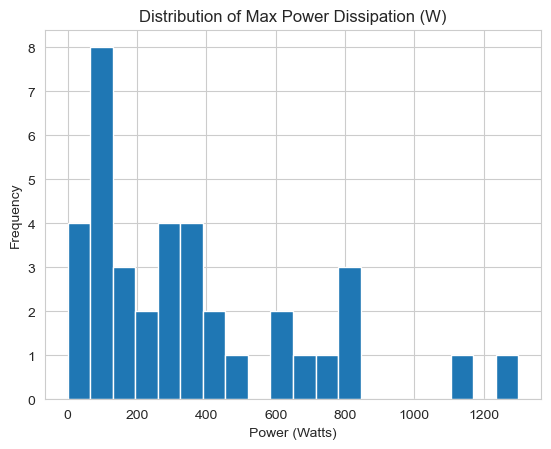

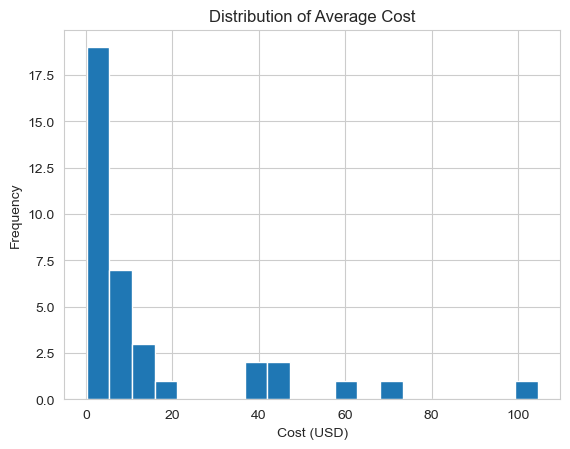

In [1498]:
# Create power dissipation distribution
df['Power dissipation (max)'].hist(bins=20)
plt.title('Distribution of Max Power Dissipation (W)')
plt.xlabel('Power (Watts)')
plt.ylabel('Frequency')
plt.show()

# Create avg cost distribution

df['Avg Cost'].hist(bins=20)
plt.title('Distribution of Average Cost')
plt.xlabel('Cost (USD)')
plt.ylabel('Frequency')
plt.show()

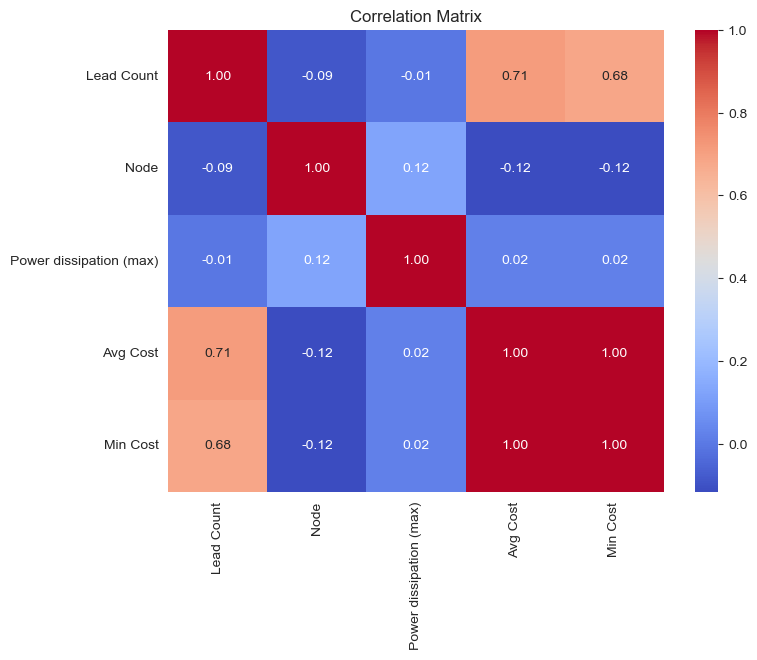

In [1499]:
# Select numeric columns for correlation
numeric_cols = [
    'Lead Count',
    'Node',  
    'Power dissipation (max)',
    'Avg Cost',
    'Min Cost'
]

# Build correlation matrix
corr_data = df[numeric_cols].dropna() 
corr_matrix = corr_data.corr()
corr_matrix

# Visualize with heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


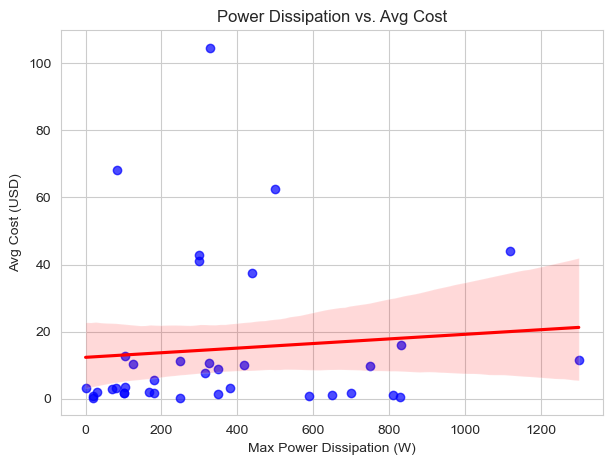

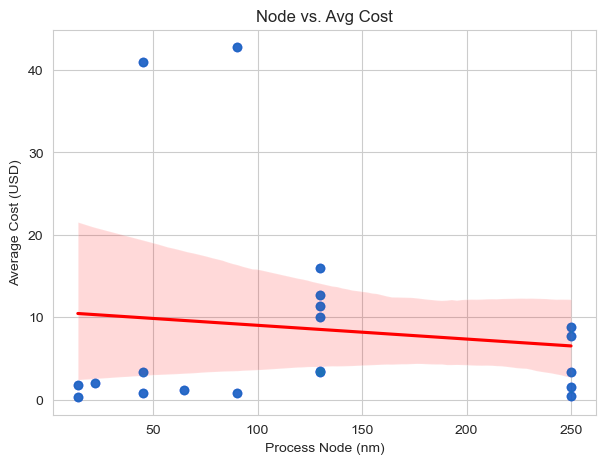

In [1500]:
# Max power dis. vs Avg cost

plt.figure(figsize=(7,5))
sns.regplot(
    x='Power dissipation (max)',
    y='Avg Cost',
    data=df,
    scatter_kws={'alpha': 0.7, 'color': 'blue'},  
    line_kws={'color': 'red'}                     
)
plt.xlabel('Max Power Dissipation (W)')
plt.ylabel('Avg Cost (USD)')
plt.title('Power Dissipation vs. Avg Cost')
plt.show()

# Node size vs Avg Cost

plt.figure(figsize=(7,5))
sns.regplot(
    x='Node',
    y='Avg Cost',
    data=df,
    scatter_kws={'alpha': 0.7, 'color': 'blue'},  
    line_kws={'color': 'red'}
)

plt.scatter(df['Node'], df['Avg Cost'], alpha=0.7)
plt.xlabel('Process Node (nm)')
plt.ylabel('Average Cost (USD)')
plt.title('Node vs. Avg Cost')
plt.show()



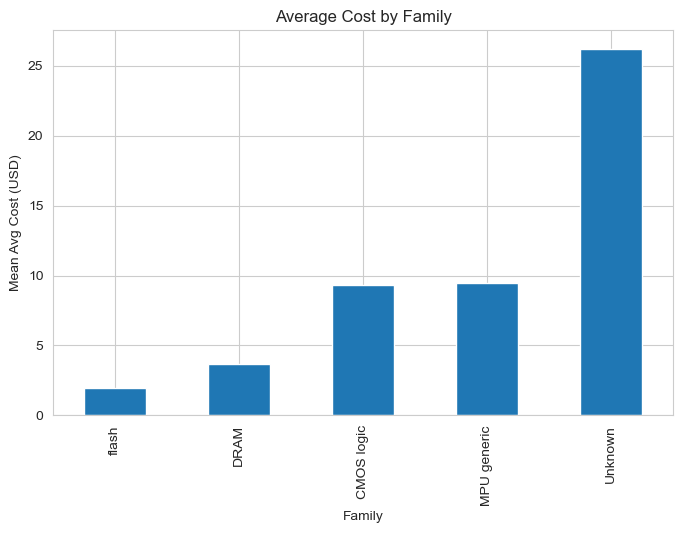

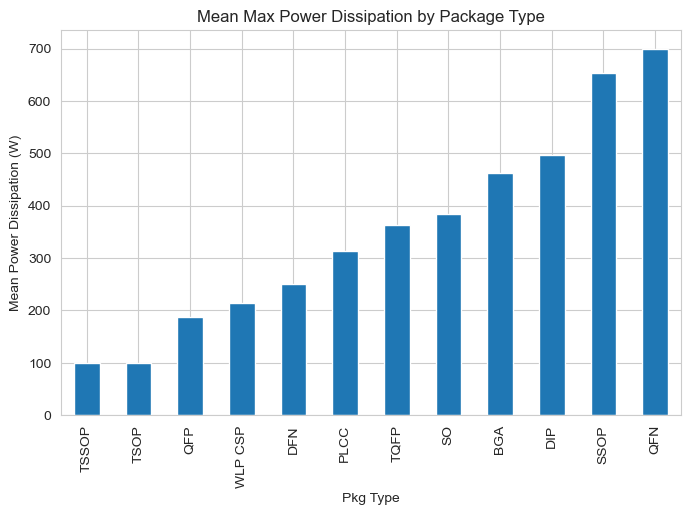

In [1501]:
# Group by family
df.groupby('Family')['Avg Cost'].mean().sort_values().plot(kind='bar', figsize=(8,5))
plt.ylabel('Mean Avg Cost (USD)')
plt.title('Average Cost by Family')
plt.show()

# Group by Pkg type
df.groupby('Pkg Type')['Power dissipation (max)'].mean().sort_values().plot(kind='bar', figsize=(8,5))
plt.ylabel('Mean Power Dissipation (W)')
plt.title('Mean Max Power Dissipation by Package Type')
plt.show()


In [1502]:
# Cost calculations for different distributors 
price_cols = [
    'DigiKey (soq)', 'DigiKey (TR1500 or 1000)',
    'Arrow (soq)', 'Arrow (1500)',
    'Mouser (soq)', 'Mouser (1500)',
    'Rochester (1000)', 'Avnet (1000)'
]

df[price_cols].describe()


,DigiKey (soq),DigiKey (TR1500 or 1000),Arrow (soq),Arrow (1500),Mouser (soq),Mouser (1500),Rochester (1000),Avnet (1000)
count,35.000000,15.000000,14.000000,12.000000,19.000000,14.000000,22.000000,19.000000
mean,17.362571,13.035143,14.551429,5.477500,17.614737,10.058000,14.850000,13.489263
std,26.107943,18.940770,26.680112,5.042321,27.448645,13.884419,22.911264,18.493795
min,0.380000,0.290000,0.440000,0.390000,0.390000,0.120000,0.090000,0.210000
25%,2.020000,1.290000,1.607500,1.302500,1.780000,0.935500,1.395000,1.540000
50%,6.470000,3.340000,5.060000,3.455000,7.180000,4.150000,5.210000,3.380000
75%,14.400000,13.105000,11.612500,9.167500,16.275000,10.665000,10.697500,13.553000
max,115.580000,59.610000,101.450000,15.510000,114.980000,42.180000,86.390000,58.080000
